# Data Bootcamp Project - Detroit Gentrification Analysis
Annie Jankowsi and Jamil Uddin

**Add a description of our analysis here**


## Preliminaries 

In [2]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 
import requests as r
from io import StringIO
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import seaborn as sns
import sys
%matplotlib inline                     

# check versions
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.1 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.0
Today:  2016-05-02


# Data Collection
All of our data for this analysis is pulled from online sources at the below URL links. Note that this list is dynamic and 
is updated daily (for building permit data). 

The numbers in our anaylsis are as of **insert date of when we complete the project here**

## 2013 American Community Survey (ACS) Data Set:

In [3]:
# get "response" from url 
url = 'http://www2.census.gov/acs2013_1yr/pums/csv_hus.zip'
r = requests.get(url) 

# describe response 
print('Response status code:', r.status_code)
print('Response type:', type(r))
print('Response .content:', type(r.content)) 
print('Response headers:\n', r.headers, sep='')

http://www2.census.gov/acs2013_1yr/pums/csv_pus.zip

Response status code: 200
Response type: <class 'requests.models.Response'>
Response .content: <class 'bytes'>
Response headers:
{'ETag': '"15522b4-f7715e1-50ee396cdfb80"', 'Server': 'Apache', 'Content-Length': '259462625', 'Content-Type': 'application/zip', 'Date': 'Mon, 02 May 2016 23:12:40 GMT', 'Last-Modified': 'Thu, 12 Feb 2015 12:52:14 GMT', 'Accept-Ranges': 'bytes', 'Connection': 'keep-alive'}


In [12]:
# get "response" from url 
url1 = 'http://www2.census.gov/acs2013_1yr/pums/csv_pus.zip'
r1 = requests.get(url1) 

# describe response 
print('Response status code:', r.status_code)
print('Response type:', type(r))
print('Response .content:', type(r.content)) 
print('Response headers:\n', r.headers, sep='')

Response status code: 200
Response type: <class 'requests.models.Response'>
Response .content: <class 'bytes'>
Response headers:
{'ETag': '"15522b4-f7715e1-50ee396cdfb80"', 'Server': 'Apache', 'Content-Length': '259462625', 'Content-Type': 'application/zip', 'Date': 'Mon, 02 May 2016 23:23:15 GMT', 'Last-Modified': 'Thu, 12 Feb 2015 12:52:14 GMT', 'Accept-Ranges': 'bytes', 'Connection': 'keep-alive'}


In [15]:
# convert bytes to zip file  
r1 = requests.get(url1)
mlz = zf.ZipFile(io.BytesIO(r.content)) 
print('Type of zipfile object:', type(mlz))

Type of zipfile object: <class 'zipfile.ZipFile'>


In [17]:
mlz1 = zf.ZipFile(io.BytesIO(r1.content)) 
print('Type of zipfile object:', type(mlz1))

Type of zipfile object: <class 'zipfile.ZipFile'>


In [18]:
# what's in the zip file?
mlz1.namelist()

['ss13pusa.csv', 'ss13pusb.csv', 'ACS2013_PUMS_README.pdf']

In [180]:
# extract and read csv's. These two files contain the housing data set:
housing1  = pd.read_csv(mlz.open(mlz.namelist()[0]))
housing2  = pd.read_csv(mlz.open(mlz.namelist()[1]))

In [181]:
# extract and read csv's. These two files contain the population data set:
population1  = pd.read_csv(mlz1.open(mlz1.namelist()[0]))
population2  = pd.read_csv(mlz1.open(mlz1.namelist()[1]))

Data dictionary can be found here:
http://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict13.txt

PUMA info:
http://www2.census.gov/geo/pdfs/reference/puma/2010_PUMA_Names.pdf      
                                
 

In [184]:
#Get select columns
smallhousing = housing1[["SERIALNO","ST", "PUMA","NP", "BATH", "BDSP", "BLD", "CONP", "FS", "MRGP", "RMSP", "RNTP", "VACS", 
                        "VALP", "HINCP", "MV", "TAXP", "YBL"]]
smallhousing2 = housing2[["SERIALNO","ST", "PUMA","NP", "BATH", "BDSP", "BLD", "CONP", "FS", "MRGP", "RMSP", "RNTP", "VACS", 
                        "VALP", "HINCP", "MV", "TAXP", "YBL"]]
#Combine both dataframes into a single housing Dataframe:
housingdfs = [smallhousing, smallhousing2]
housingComplete = pd.concat(housingdfs)

#rename columns so we understand what they are:
housingComplete = housingComplete.rename(columns={'ST':'State', 'NP':'Number of Persons','BATH':'Bathrooms','BDSP':'Bedrooms',
                                            'BLD':'Units','CONP':'Condo_Fee','FS':'Food_Stamps?','MRGP':'Mortgage_Pmt', 
                                            'RMSP':'Number_Rooms','RNTP':'Monthly_Rent', 'VACS':'Vacancy_Status', 
                                            'VALP':'Property_Value','HINCP':'Household_Income', 'MV':'When_Moved', 
                                            'TAXP':'Property_Tax', 'YBL':'Year_Built'})
#Get select columns
smallpopulation1 = population1[["SERIALNO","PUMA","ST","DECADE","AGEP","SEX","SCHL"]]
smallpopulation2 = population2[["SERIALNO","PUMA","ST","DECADE","AGEP","SEX","SCHL"]]

#Combine both dataframes into a single population Dataframe:
populationdfs = [smallpopulation1, smallpopulation2]
populationComplete = pd.concat(populationdfs)
populationComplete = populationComplete.rename(columns={'ST':'State','AGEP':'Age'})

In [188]:
#Boolean Logic to refine data for Brooklyn
statecodesNYC = [36] #state code for NY
pumacodesNYC = [4005] #codes for Brooklyn (Park Slope)
smallhousingNYC = housingComplete[(housingComplete['State'].isin(statecodesNYC) & housingComplete['PUMA'].isin(pumacodesNYC))]
smallpopulationNYC = populationComplete[(populationComplete['State'].isin(statecodesNYC) 
                                         & populationComplete['PUMA'].isin(pumacodesNYC))]
smallpopulationNYC.shape

(1101, 7)

In [191]:
#Boolean Logic to refine data for Detroit and Brooklyn
statecodes = [26,36] #state code for Michigan and Brooklyn
pumacodes = [3209,3210,3211,3212,4005] #codes for detroit and Park Slope
smallhousingAll = housingComplete[(housingComplete['State'].isin(statecodes) & housingComplete['PUMA'].isin(pumacodes))]
smallpopulationAll = populationComplete[(populationComplete['State'].isin(statecodes) & populationComplete['PUMA'].isin(pumacodes))]
smallhousingAll.shape

(4308, 18)

In [192]:
smallhousingAll.head()

,SERIALNO,State,PUMA,Number of Persons,Bathrooms,Bedrooms,Units,Condo_Fee,Food_Stamps?,Mortgage_Pmt,Number_Rooms,Monthly_Rent,Vacancy_Status,Property_Value,Household_Income,When_Moved,Property_Tax,Year_Built
665844,1392,26,3209,5,1.0,3.0,2.0,NaN,1.0,NaN,6.0,900.0,NaN,NaN,46600.0,3.0,NaN,2.0
665858,2026,26,3210,2,1.0,4.0,4.0,NaN,2.0,NaN,10.0,NaN,NaN,11000.0,68000.0,6.0,22.0,1.0
665890,2866,26,3212,7,1.0,4.0,2.0,NaN,1.0,NaN,7.0,NaN,NaN,NaN,11000.0,1.0,NaN,1.0
665908,3606,26,3212,1,1.0,2.0,4.0,NaN,2.0,NaN,7.0,500.0,NaN,NaN,1800.0,6.0,NaN,2.0
665909,3636,26,3210,3,1.0,3.0,2.0,NaN,1.0,NaN,8.0,NaN,NaN,30000.0,20900.0,2.0,22.0,4.0


In [193]:
smallpopulationAll.head()

,SERIALNO,PUMA,State,DECADE,Age,SEX,SCHL
1429668,1392,3209,26,NaN,41,2,19.0
1429669,1392,3209,26,NaN,17,2,14.0
1429670,1392,3209,26,NaN,14,1,10.0
1429671,1392,3209,26,NaN,9,1,7.0
1429672,1392,3209,26,NaN,3,1,2.0


In [194]:
#Merge housing and population files to do analysis on specific variables that are in different dataframes
combo = pd.merge(smallhousingAll, smallpopulationAll,   # left and right df's
                 how='left',        # add to left 
                 on='SERIALNO'       # link with this variable/column 
                )
combo1 = combo[["Household_Income","DECADE"]].dropna()
combo2 = combo[["State_x","Household_Income","Age","SEX","SCHL"]].dropna()

In [195]:
comboNYC = pd.merge(smallhousingNYC, smallpopulationNYC,   # left and right df's
                 how='left',        # add to left 
                 on='SERIALNO'       # link with this variable/column 
                )
comboNYC1 = comboNYC[["Household_Income","DECADE"]].dropna()

(0, 1600000)

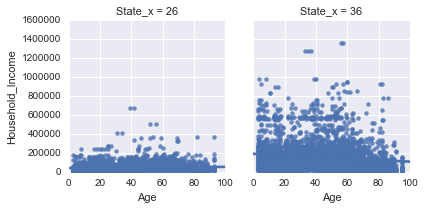

In [196]:
g4 = sns.FacetGrid(combo2, col="State_x")  
g4.map(sns.regplot, "Age", "Household_Income")  
plt.xlim(0, 100)  
plt.ylim(0, 1600000) 

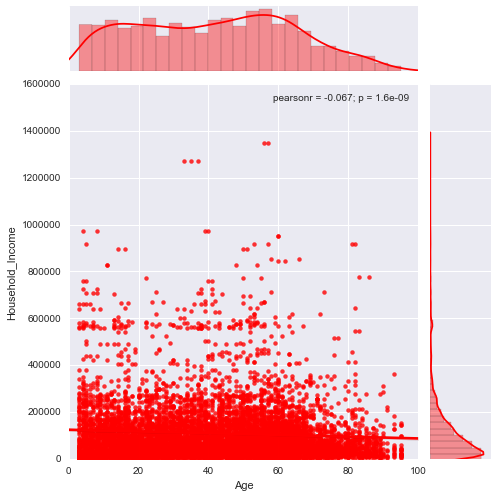

In [197]:
#combo2.plot.scatter("Age","Household_Income")

#Joint Plot showing Age vs. Household Income
g3 = sns.jointplot("Age","Household_Income", data=combo2, kind="reg",
                  xlim=(0, 100), ylim=(0, 1600000), color="r", size=7)

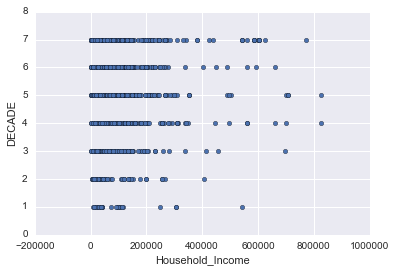

In [198]:
combo1.plot.scatter("Household_Income","DECADE")

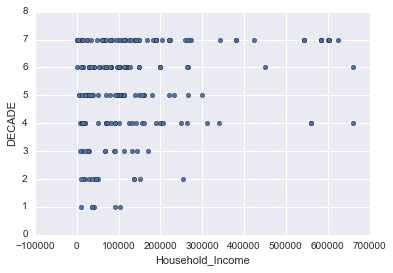

In [199]:
comboNYC.plot.scatter("Household_Income","DECADE")

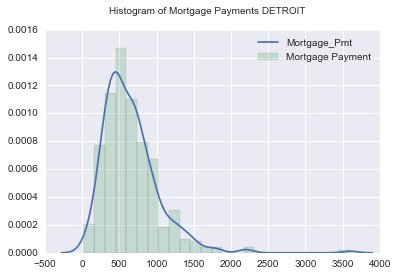

In [200]:
fig, ax = plt.subplots()

sns.kdeplot(smallhousingDetroit["Mortgage_Pmt"], ax=ax)
ax.hist(smallhousingDetroit["Mortgage_Pmt"].dropna(), bins=25, alpha=0.25, normed=True, label="Mortgage Payment")
ax.legend()

fig.suptitle("Histogram of Mortgage Payments DETROIT")

plt.show()

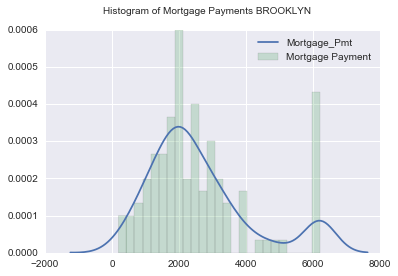

In [201]:
fig, ax = plt.subplots()

sns.kdeplot(smallhousingNYC["Mortgage_Pmt"], ax=ax)
ax.hist(smallhousingNYC["Mortgage_Pmt"].dropna(), bins=25, alpha=0.25, normed=True, label="Mortgage Payment")
ax.legend()

fig.suptitle("Histogram of Mortgage Payments BROOKLYN")

plt.show()

(0, 250000)

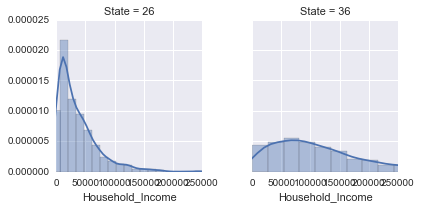

In [202]:
g2 = sns.FacetGrid(smallhousing, col="State")  
g2.map(sns.distplot, "Household_Income")  
plt.xlim(0, 250000)  
#plt.ylim(0, .00003) 


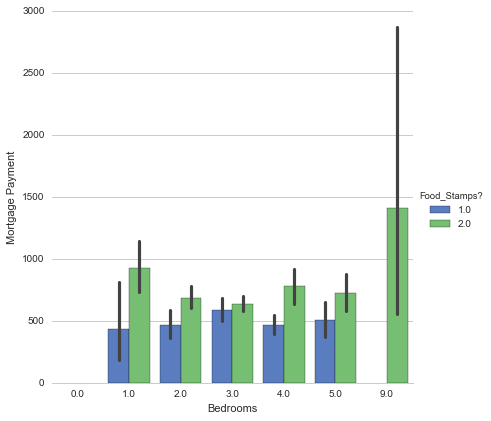

In [203]:
sns.set(style="whitegrid")

# Draw a nested barplot to show mortgage payments by number of bedrooms, for people who have or don't have foodstamps
g = sns.factorplot(x="Bedrooms", y="Mortgage_Pmt", hue="Food_Stamps?", data=smallhousingDetroit,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Mortgage Payment")


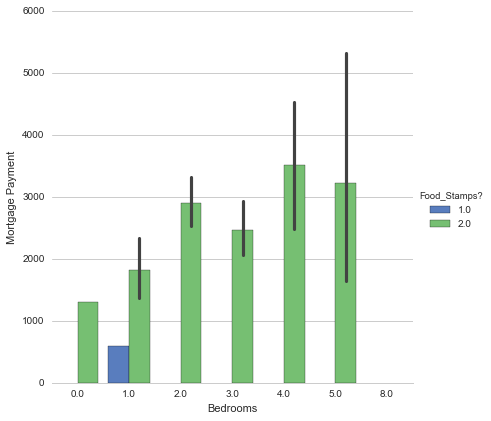

In [204]:
sns.set(style="whitegrid")

# Draw a nested barplot to show mortgage payments by number of bedrooms, for people who have or don't have foodstamps
g = sns.factorplot(x="Bedrooms", y="Mortgage_Pmt", hue="Food_Stamps?", data=smallhousingNYC,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Mortgage Payment")

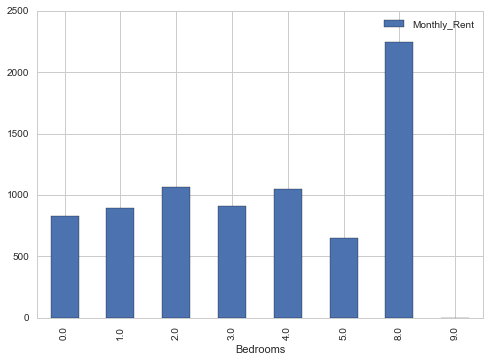

In [205]:
averageRent = smallhousing[["Monthly_Rent","Bedrooms"]]
fig1 = pd.pivot_table(averageRent,index=["Bedrooms"])
fig1.plot(kind = "bar")

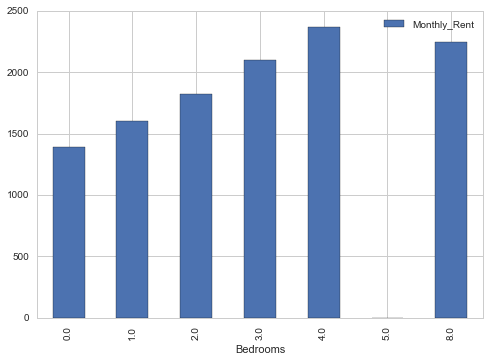

In [206]:
averageRent = smallhousingNYC[["Monthly_Rent","Bedrooms"]]
fig1 = pd.pivot_table(averageRent,index=["Bedrooms"])
fig1.plot(kind = "bar")